In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df1=pd.read_csv('/work/ADANIPORTS.csv')

In [ ]:
df1.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
df1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


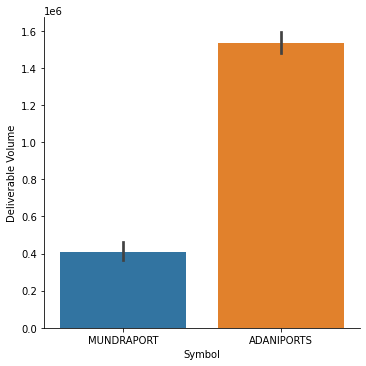

In [ ]:
sns.catplot(x="Symbol", y="Deliverable Volume", kind="bar", data=df1)

<AxesSubplot:xlabel='VWAP', ylabel='Volume'>

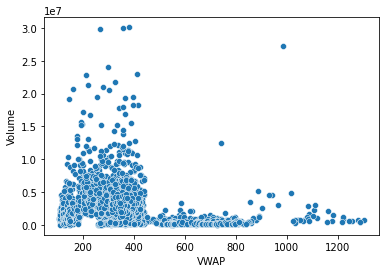

In [ ]:
sns.scatterplot(x='VWAP',y='Volume',data=df1)

In [ ]:
df1.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

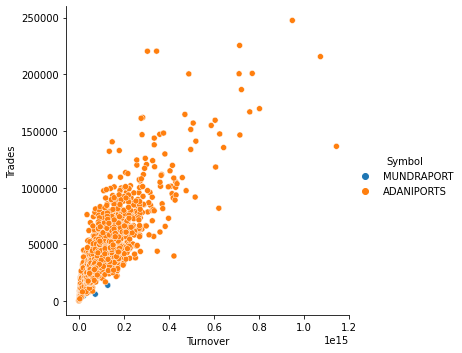

In [ ]:
sns.relplot(x='Turnover',y='Trades',hue='Symbol',data=df1)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trades', ylabel='Density'>

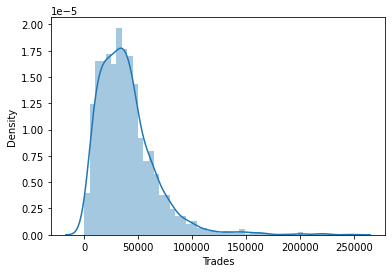

In [ ]:
sns.distplot(df1.Trades)


In [ ]:
df1['Trades']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3215     49565.0
3216    200786.0
3217    186507.0
3218    141046.0
3219    103550.0
Name: Trades, Length: 3220, dtype: float64

In [ ]:
mean1=df1['Trades'].mean()

In [ ]:
mean1

39191.442225998304

In [ ]:
df1['Trades'].fillna(mean1, inplace=True)

In [ ]:
df1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,39191.442226,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,39191.442226,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,39191.442226,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,39191.442226,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,39191.442226,816123,0.2741


In [ ]:
x=df1[['Prev Close','Open','High','Low','Last','Close','VWAP','Volume','Turnover']]
y=df1['Deliverable Volume']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.score(X_test,y_test)

0.7979532652738264